In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simplified Hodgkin-Huxley model
If we focus on the plots for the ion activation and inactivation variables $m$, $h$ and $n$ and the time constant variables for each $\tau_m$, $\tau_h$ and $\tau_n$, we notice two simplifications that can be made to the HH model.

Simplification 1: $\tau_m$ is very small irrespective of the membrane potential. So we can make the approximation $m \approx m_{\infty}$

Simplification 2: Variables $n$ and $h$ look related such that $n + h \approx 1$

Based on these two simplifications, we can reduce the HH model from being 4D to 2D. We will now replace $n$ by $w$ and $h$ by $1-w$.

In [2]:
class SimplifiedHHNeuron:
    def __init__(self, Cm, g_Na, g_K, g_L, V_Na, V_K, V_L, V0, m0, w0):
        # Set the parameters of the simplified HH neuron
        self.Cm = Cm      # Membrane capacitance
        self.g_Na = g_Na  # Sodium conductance
        self.g_K = g_K    # Potassium conductance
        self.g_L = g_L    # Leak conductance
        self.V_Na = V_Na  # Sodium reversal potential
        self.V_K = V_K    # Potassium reversal potential
        self.V_L = V_L    # Leak reversal potential
        
        # Set the initial state of the simplified HH neuron
        self.V = V0                  # Initial membrane potential
        self.m = m0                  # Initial m activation variable
        self.w = w0                  # Initial w activation variable
        self.t_last_spike = -np.inf  # Last spike time (initialised to a large negative value)
        self.n_spikes = 0            # Number of spikes (initialised to 0)
        
    def update(self, dt, I):
        # Compute the ionic currents
        I_Na = self.g_Na*self.m**3*(1-self.w)*(self.V-self.V_Na)
        I_K = self.g_K*self.w**4*(self.V-self.V_K)
        I_L = self.g_L*(self.V-self.V_L)

        # Compute the steady-state values and time constants of the activation and inactivation variables
        alpha_m = (2.5-0.1*(self.V+65))/(np.exp(2.5-0.1*(self.V+65))-1)
        beta_m = 4*np.exp(-(self.V+65)/18)
        alpha_w = (0.1-0.01*(self.V+65))/(np.exp(1-0.1*(self.V+65))-1)
        beta_w = 0.125*np.exp(-(self.V+65)/80)
        
        m_inf = alpha_m/(alpha_m+beta_m)
        w_inf = alpha_w/(alpha_w+beta_w)
        tau_w = 1/(alpha_w+beta_w)

        # Update the membrane potential using the HH equation
        dV = (I - I_Na - I_K - I_L)/self.Cm
        self.V += dV*dt

        # Update the activation and inactivation variables using the HH equations
        self.m = m_inf
        self.w += (w_inf - self.w)*dt/tau_w

In [3]:
# Create an instance of the simplified HHNeuron class
neuron = SimplifiedHHNeuron(Cm=1, g_Na=120, g_K=36, g_L=0.3, V_Na=60, V_K=-77, V_L=-54.4, V0=-70, m0=0.05, w0=0.34)

# Set the time step and the time range
dt = 0.01
t = np.arange(0, 100, dt)

# Initialize an empty list to store the membrane potentials
V = []
m = []
w = []

# Iterate over the time range
for i in range(len(t)):
    I = 10                # Constant current input
    neuron.update(dt, I)  # Update state of the neuron
    V.append(neuron.V)    # Append the membrane potential to the list
    m.append(neuron.m)    # Append the Na activation channel to the list
    w.append(neuron.w)    # Append the K activation channel to the list

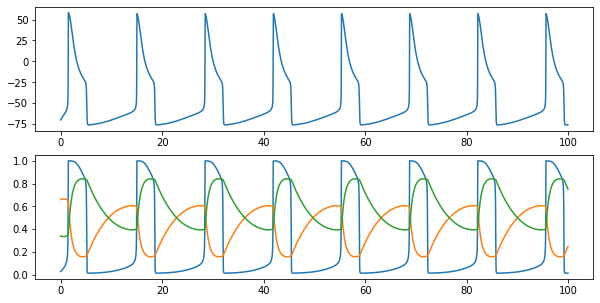

In [6]:
# Plot memebrane potential over time
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,5))
ax1.plot(t,V)
ax2.plot(t,m)
ax2.plot(t,[1-x for x in w])
ax2.plot(t,w)
plt.show()

(0.0, 1.0)

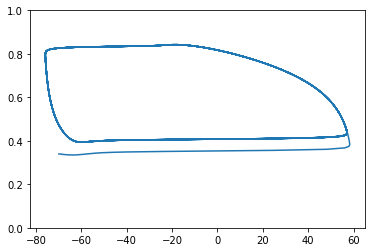

In [5]:
plt.plot(V,w)
plt.ylim(0,1)